In [2]:
import sklearn
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import numpy as np
import pickle
import os
import matplotlib.pyplot as plt

## Preparing Data
60% training, 20% validation, and 20% testing

In [9]:
# TODO: Move these two functions to a shared file for helper functions
def unPickleData(filename):
  with open(filename,'rb') as f: arr = pickle.load(f)
  return arr

def getDataPath(dirname,filename):
  return os.path.join(os.path.abspath(os.path.join(os.getcwd(), os.pardir, os.pardir)),"processed_data", dirname,filename)

x_data = unPickleData(getDataPath("posts","X_posts_sub.pkl"))
y_data = unPickleData(getDataPath("posts","Y_posts_sub.pkl"))

n = len(x_data)
x_data_training = x_data[:int(0.6*n)]
x_data_validation = x_data[int(0.6*n):int(0.8*n)]
x_data_testing = x_data[int(0.8*n):]

y_data_training = y_data[:int(0.6*n)]
y_data_validation = y_data[int(0.6*n):int(0.8*n)]
y_data_testing = y_data[int(0.8*n):]

## Training

In [10]:
model_lin = SVC(kernel="linear")
model_lin.fit(x_data_training, y_data_training)

SVC(kernel='linear')

## Learning Curve for Linear SVM

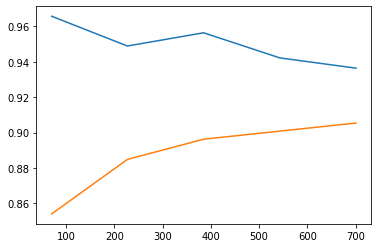

In [11]:
train_sizes, train_scores, test_scores = sklearn.model_selection.learning_curve(model_lin,x_data_training,y_data_training)
plt.plot(train_sizes,np.mean(train_scores,axis=1))
plt.plot(train_sizes,np.mean(test_scores,axis=1))

In [12]:
model_poly = SVC(kernel="poly")
model_poly.fit(x_data_training, y_data_training)

SVC(kernel='poly')

## Learning Curve for Polynomial SVM

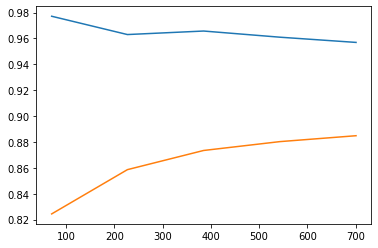

In [13]:
train_sizes, train_scores, test_scores = sklearn.model_selection.learning_curve(model_poly,x_data_training,y_data_training)
plt.plot(train_sizes,np.mean(train_scores,axis=1))
plt.plot(train_sizes,np.mean(test_scores,axis=1))

## Model Selection

In [14]:
grid = {"C":np.logspace(-3,3,100)}

search = GridSearchCV(model_lin,grid,cv=10)
search.fit(x_data_validation,y_data_validation)

print("Tuned hpyerparameters :(best parameters) ",search.best_params_)
print("Accuracy :",search.best_score_)

best_model_lin = search.best_estimator_

In [ ]:
grid = {'C':np.logspace(-3,3,10), 'degree':[1,2,3,4,5], 'gamma':['scale', 'auto'], 'coef0':np.logspace(0,1,10)}

search = GridSearchCV(model_poly,grid,cv=10)
search.fit(x_data_validation,y_data_validation)

print("Tuned hpyerparameters :(best parameters) ",search.best_params_)
print("Accuracy :",search.best_score_)

best_model_poly = search.best_estimator_

Tuned hpyerparameters :(best parameters)  {'C': 0.46415888336127775, 'coef0': 1.0, 'degree': 4, 'gamma': 'scale'}
Accuracy : 0.8906896551724138


## Testing

In [ ]:
y_pred = best_model_lin.predict(x_data_testing)

print(sklearn.metrics.classification_report(y_data_testing,y_pred))
print("Accuracy: ", sklearn.metrics.accuracy_score(y_data_testing, y_pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94       218
           1       1.00      0.64      0.78        75

    accuracy                           0.91       293
   macro avg       0.94      0.82      0.86       293
weighted avg       0.92      0.91      0.90       293

Accuracy:  0.9078498293515358


In [ ]:
y_pred = best_model_poly.predict(x_data_testing)

print(sklearn.metrics.classification_report(y_data_testing,y_pred))
print("Accuracy: ", sklearn.metrics.accuracy_score(y_data_testing, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       218
           1       0.94      0.63      0.75        75

    accuracy                           0.89       293
   macro avg       0.91      0.81      0.84       293
weighted avg       0.90      0.89      0.89       293

Accuracy:  0.89419795221843
